(6877, 14, 16, 8)
(6877, 14)
14


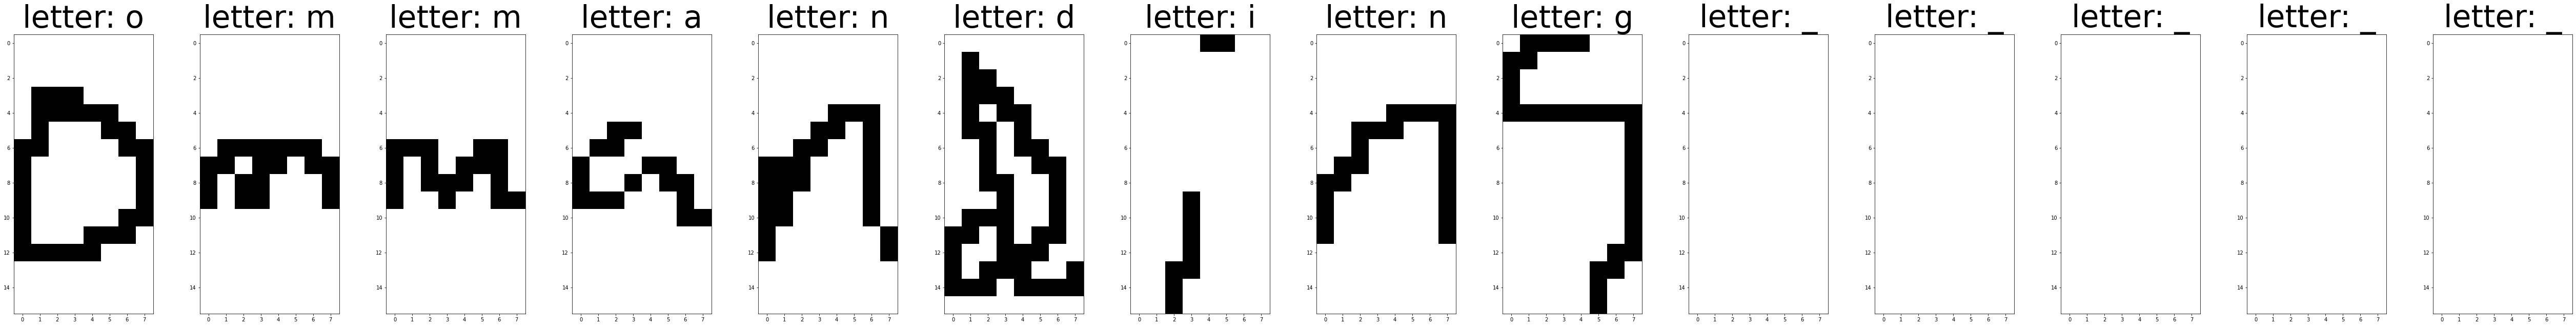

(6877, 14, 128)
(6877, 14, 26)
(60000, 28, 28)
(60000,)


In [327]:
from lazy import lazy
import gzip
import os
import csv
import string
import numpy as np
from itertools import islice
import urllib
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from keras.datasets import mnist

def _read(filepath):
    with gzip.open(filepath, 'rt') as file_:
        reader = csv.reader(file_, delimiter='\t')
        lines = list(reader)
        return lines

def _parse(lines):
    lines = sorted(lines, key=lambda x: int(x[0]))
    data, target = [], []
    next_ = None
    for line in lines:
        if not next_:
            data.append([])
            target.append([])
        else:
            assert next_ == int(line[0])
        next_ = int(line[2]) if int(line[2]) > -1 else None
        pixels = np.array([int(x) for x in line[6:134]])
        pixels = pixels.reshape((16, 8))
        data[-1].append(pixels)
        target[-1].append(line[1])
    return data, target

def _pad(data, target):
    max_length = max(len(x) for x in target)
    padding = np.zeros((16, 8))
    data = [x + ([padding] * (max_length - len(x))) for x in data]
    target = [x + ([''] * (max_length - len(x))) for x in target]
    return np.array(data), np.array(target)

URL = 'http://ai.stanford.edu/~btaskar/ocr/letter.data.gz'


path, _ = urllib.request.urlretrieve(URL)
lines = _read(path)
data, target = _parse(lines)

data,target = _pad(data, target)  
print(data.shape)
print(target.shape)
data = data.reshape(data.shape[:2] + (-1,))
# One-hot encode targets.
target1 = np.zeros(target.shape + (26,))
for index, letter in np.ndenumerate(target):
    if letter:
        target1[index][ord(letter) - ord('a')] = 1
target = target1
# Shuffle order of examples.
#order = np.random.permutation(len(data))
#data = data[order]
#target = target[order]


def plot_word(x, y):
    n_letters = x.shape[0]
    print(n_letters)
    plt.figure(1, figsize=(90, 10))

    for i, (letter_img, one_hot_char) in enumerate(zip(x, y)):
        c_ind = np.argmax(one_hot_char)
        let = string.ascii_lowercase[c_ind] if any(one_hot_char) else '_'
        plt.subplot(1, n_letters, i+1)
        plt.title('letter: {}'.format(let), fontsize=60)
        plt.imshow(letter_img.reshape(16, 8), cmap='gray_r')
    plt.show()

x = data[0]
y = target[0]
plot_word(x, y)
print(data.shape)
print(target.shape)

#nsamples, nx, ny = data.shape
#data = data.reshape((nsamples,nx*ny))
#print(data.shape)
#print(target.shape)


#print(X_train_feature)
#model = LinearSVC(C=10)
#model.fit(data,target)
(X_train1,y_train1),(X_test,y_test) = mnist.load_data()
print(X_train1.shape)
print(y_train1.shape)


In [17]:
def plot_word(x, y):
    n_letters = x.shape[0]
    print(n_letters)
    plt.figure(1, figsize=(90, 10))

    for i, (letter_img, one_hot_char) in enumerate(zip(x, y)):
        c_ind = np.argmax(one_hot_char)
        let = string.ascii_lowercase[c_ind] if any(one_hot_char) else '_'
        plt.subplot(1, n_letters, i+1)
        plt.title('letter: {}'.format(let), fontsize=60)
        plt.imshow(letter_img.reshape(16, 8), cmap='gray_r')
    plt.show()


u
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0.]


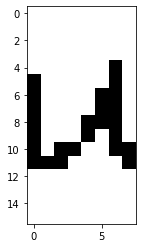

In [18]:
x = data[5000,5]
y = target[5000,5]
plt.imshow(x.reshape(16, 8), cmap='gray_r')
c_ind = np.argmax(y)
let = string.ascii_lowercase[c_ind] if any(y) else '_'
print(let)
#plot_word(x, y)
print(x,y)

In [19]:
cuahang = ['banhmi', 'sua', 'keo']

for item in enumerate(cuahang):
     print(item)

print('\n')
for count, item in enumerate(cuahang):
     print(count, item)

(0, 'banhmi')
(1, 'sua')
(2, 'keo')


0 banhmi
1 sua
2 keo


In [20]:
print(data.shape,target.shape)

(6877, 14, 128) (6877, 14, 26)


In [21]:
print(data[500,4][0:129])

[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0.]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


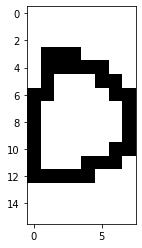

In [22]:
print(data[0,0])
plt.imshow(data[0,0].reshape(16, 8), cmap='gray_r')

In [23]:
print(target[500,4])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [24]:
print(X_train1.shape)
print(y_train1.shape)

(60000, 28, 28)
(60000,)


In [25]:
print(X_train1[500,27])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [26]:
print(y_train1[500,])


3


In [27]:
new_data= data.reshape(6877*14,128)
y=target.reshape(6877*14,26)
new_target=[]
index=[]
t=0
for i in range(0,96278):
    c_ind = np.argmax(y[i])
    let = string.ascii_lowercase[c_ind] if any(y[i]) else '_'
    new_target.append(let)
    if let=='_' :
        index.append(i)
    
print("OK")
new_target =np.array(new_target)
print("OK")
print(new_target.shape,new_data.shape)
for n in index:
    k=n-t
    print(k)
    new_data=np.delete(new_data, (k), axis=0)
    new_target=np.delete(new_target, (k), axis=0) 
    t=t+1
    
  
    

#new_target= new_target.reshape(96278,-1)
print(new_target.shape,new_data.shape)

OK
OK
(96278,) (96278, 128)
9
9
9
9
9
18
18
18
18
18
27
27
27
27
27
36
36
36
36
36
45
45
45
45
45
54
54
54
54
54
63
63
63
63
63
72
72
72
72
72
81
81
81
81
81
90
90
90
90
90
99
99
99
99
99
108
108
108
108
108
117
117
117
117
117
126
126
126
126
126
135
135
135
135
135
144
144
144
144
144
153
153
153
153
153
162
162
162
162
162
171
171
171
171
171
180
180
180
180
180
189
189
189
189
189
198
198
198
198
198
207
207
207
207
207
216
216
216
216
216
225
225
225
225
225
234
234
234
234
234
243
243
243
243
243
252
252
252
252
252
261
261
261
261
261
270
270
270
270
270
279
279
279
279
279
288
288
288
288
288
297
297
297
297
297
306
306
306
306
306
315
315
315
315
315
324
324
324
324
324
333
333
333
333
333
342
342
342
342
342
351
351
351
351
351
360
360
360
360
360
369
369
369
369
369
378
378
378
378
378
387
387
387
387
387
396
396
396
396
396
405
405
405
405
405
414
414
414
414
414
423
423
423
423
423
432
432
432
432
432
441
441
441
441
441
450
450
450
450
450
459
459
459
459
459
468
468
468


2290
2290
2290
2290
2290
2290
2290
2297
2297
2297
2297
2297
2297
2297
2304
2304
2304
2304
2304
2304
2304
2311
2311
2311
2311
2311
2311
2311
2318
2318
2318
2318
2318
2318
2318
2325
2325
2325
2325
2325
2325
2325
2332
2332
2332
2332
2332
2332
2332
2339
2339
2339
2339
2339
2339
2339
2346
2346
2346
2346
2346
2346
2346
2353
2353
2353
2353
2353
2353
2353
2360
2360
2360
2360
2360
2360
2360
2367
2367
2367
2367
2367
2367
2367
2374
2374
2374
2374
2374
2374
2374
2381
2381
2381
2381
2381
2381
2381
2388
2388
2388
2388
2388
2388
2388
2395
2395
2395
2395
2395
2395
2395
2402
2402
2402
2402
2402
2402
2402
2409
2409
2409
2409
2409
2409
2409
2416
2416
2416
2416
2416
2416
2416
2423
2423
2423
2423
2423
2423
2423
2430
2430
2430
2430
2430
2430
2430
2437
2437
2437
2437
2437
2437
2437
2444
2444
2444
2444
2444
2444
2444
2451
2451
2451
2451
2451
2451
2451
2458
2458
2458
2458
2458
2458
2458
2465
2465
2465
2465
2465
2465
2465
2472
2472
2472
2472
2472
2472
2472
2479
2479
2479
2479
2479
2479
2479
2486
2486
2486
2486


4728
4728
4728
4734
4734
4734
4734
4734
4734
4734
4734
4740
4740
4740
4740
4740
4740
4740
4740
4746
4746
4746
4746
4746
4746
4746
4746
4752
4752
4752
4752
4752
4752
4752
4752
4758
4758
4758
4758
4758
4758
4758
4758
4764
4764
4764
4764
4764
4764
4764
4764
4770
4770
4770
4770
4770
4770
4770
4770
4776
4776
4776
4776
4776
4776
4776
4776
4782
4782
4782
4782
4782
4782
4782
4782
4788
4788
4788
4788
4788
4788
4788
4788
4794
4794
4794
4794
4794
4794
4794
4794
4800
4800
4800
4800
4800
4800
4800
4800
4806
4806
4806
4806
4806
4806
4806
4806
4812
4812
4812
4812
4812
4812
4812
4812
4818
4818
4818
4818
4818
4818
4818
4818
4824
4824
4824
4824
4824
4824
4824
4824
4830
4830
4830
4830
4830
4830
4830
4830
4836
4836
4836
4836
4836
4836
4836
4836
4842
4842
4842
4842
4842
4842
4842
4842
4848
4848
4848
4848
4848
4848
4848
4848
4854
4854
4854
4854
4854
4854
4854
4854
4860
4860
4860
4860
4860
4860
4860
4860
4866
4866
4866
4866
4866
4866
4866
4866
4872
4872
4872
4872
4872
4872
4872
4872
4878
4878
4878
4878
4878


6300
6300
6300
6300
6303
6303
6303
6303
6303
6303
6303
6303
6303
6303
6303
6306
6306
6306
6306
6306
6306
6306
6306
6306
6306
6306
6309
6309
6309
6309
6309
6309
6309
6309
6309
6309
6309
6312
6312
6312
6312
6312
6312
6312
6312
6312
6312
6312
6315
6315
6315
6315
6315
6315
6315
6315
6315
6315
6315
6318
6318
6318
6318
6318
6318
6318
6318
6318
6318
6318
6321
6321
6321
6321
6321
6321
6321
6321
6321
6321
6321
6324
6324
6324
6324
6324
6324
6324
6324
6324
6324
6324
6327
6327
6327
6327
6327
6327
6327
6327
6327
6327
6327
6330
6330
6330
6330
6330
6330
6330
6330
6330
6330
6330
6333
6333
6333
6333
6333
6333
6333
6333
6333
6333
6333
6336
6336
6336
6336
6336
6336
6336
6336
6336
6336
6336
6339
6339
6339
6339
6339
6339
6339
6339
6339
6339
6339
6342
6342
6342
6342
6342
6342
6342
6342
6342
6342
6342
6345
6345
6345
6345
6345
6345
6345
6345
6345
6345
6345
6348
6348
6348
6348
6348
6348
6348
6348
6348
6348
6348
6351
6351
6351
6351
6351
6351
6351
6351
6351
6351
6351
6354
6354
6354
6354
6354
6354
6354
6354
6354


8098
8098
8098
8098
8107
8107
8107
8107
8107
8116
8116
8116
8116
8116
8125
8125
8125
8125
8125
8134
8134
8134
8134
8134
8143
8143
8143
8143
8143
8152
8152
8152
8152
8152
8161
8161
8161
8161
8161
8170
8170
8170
8170
8170
8179
8179
8179
8179
8179
8188
8188
8188
8188
8188
8197
8197
8197
8197
8197
8206
8206
8206
8206
8206
8215
8215
8215
8215
8215
8224
8224
8224
8224
8224
8233
8233
8233
8233
8233
8242
8242
8242
8242
8242
8251
8251
8251
8251
8251
8260
8260
8260
8260
8260
8269
8269
8269
8269
8269
8278
8278
8278
8278
8278
8287
8287
8287
8287
8287
8296
8296
8296
8296
8296
8305
8305
8305
8305
8305
8314
8314
8314
8314
8314
8323
8323
8323
8323
8323
8332
8332
8332
8332
8332
8341
8341
8341
8341
8341
8350
8350
8350
8350
8350
8359
8359
8359
8359
8359
8368
8368
8368
8368
8368
8377
8377
8377
8377
8377
8386
8386
8386
8386
8386
8395
8395
8395
8395
8395
8404
8404
8404
8404
8404
8413
8413
8413
8413
8413
8422
8422
8422
8422
8422
8431
8431
8431
8431
8431
8440
8440
8440
8440
8440
8449
8449
8449
8449
8449
8458


10610
10610
10610
10610
10610
10610
10617
10617
10617
10617
10617
10617
10617
10624
10624
10624
10624
10624
10624
10624
10631
10631
10631
10631
10631
10631
10631
10638
10638
10638
10638
10638
10638
10638
10645
10645
10645
10645
10645
10645
10645
10652
10652
10652
10652
10652
10652
10652
10659
10659
10659
10659
10659
10659
10659
10666
10666
10666
10666
10666
10666
10666
10673
10673
10673
10673
10673
10673
10673
10680
10680
10680
10680
10680
10680
10680
10687
10687
10687
10687
10687
10687
10687
10694
10694
10694
10694
10694
10694
10694
10701
10701
10701
10701
10701
10701
10701
10708
10708
10708
10708
10708
10708
10708
10715
10715
10715
10715
10715
10715
10715
10722
10722
10722
10722
10722
10722
10722
10729
10729
10729
10729
10729
10729
10729
10736
10736
10736
10736
10736
10736
10736
10743
10743
10743
10743
10743
10743
10743
10750
10750
10750
10750
10750
10750
10750
10757
10757
10757
10757
10757
10757
10757
10764
10764
10764
10764
10764
10764
10764
10771
10771
10771
10771
10771
10771
1077

11108
11108
11108
11108
11108
11108
11108
11108
11108
11108
11108
11111
11111
11111
11111
11111
11111
11111
11111
11111
11111
11111
11114
11114
11114
11114
11114
11114
11114
11114
11114
11114
11114
11117
11117
11117
11117
11117
11117
11117
11117
11117
11117
11117
11120
11120
11120
11120
11120
11120
11120
11120
11120
11120
11120
11123
11123
11123
11123
11123
11123
11123
11123
11123
11123
11123
11126
11126
11126
11126
11126
11126
11126
11126
11126
11126
11126
11129
11129
11129
11129
11129
11129
11129
11129
11129
11129
11129
11132
11132
11132
11132
11132
11132
11132
11132
11132
11132
11132
11135
11135
11135
11135
11135
11135
11135
11135
11135
11135
11135
11138
11138
11138
11138
11138
11138
11138
11138
11138
11138
11138
11141
11141
11141
11141
11141
11141
11141
11141
11141
11141
11141
11144
11144
11144
11144
11144
11144
11144
11144
11144
11144
11144
11147
11147
11147
11147
11147
11147
11147
11147
11147
11147
11147
11150
11150
11150
11150
11150
11150
11150
11150
11150
11150
11150
11153
1115

12731
12738
12738
12738
12738
12738
12738
12738
12745
12745
12745
12745
12745
12745
12745
12752
12752
12752
12752
12752
12752
12752
12759
12759
12759
12759
12759
12759
12759
12766
12766
12766
12766
12766
12766
12766
12773
12773
12773
12773
12773
12773
12773
12780
12780
12780
12780
12780
12780
12780
12787
12787
12787
12787
12787
12787
12787
12794
12794
12794
12794
12794
12794
12794
12801
12801
12801
12801
12801
12801
12801
12808
12808
12808
12808
12808
12808
12808
12815
12815
12815
12815
12815
12815
12815
12822
12822
12822
12822
12822
12822
12822
12829
12829
12829
12829
12829
12829
12829
12836
12836
12836
12836
12836
12836
12836
12843
12843
12843
12843
12843
12843
12843
12850
12850
12850
12850
12850
12850
12850
12857
12857
12857
12857
12857
12857
12857
12864
12864
12864
12864
12864
12864
12864
12871
12871
12871
12871
12871
12871
12871
12878
12878
12878
12878
12878
12878
12878
12885
12885
12885
12885
12885
12885
12885
12892
12892
12892
12892
12892
12892
12892
12899
12899
12899
12899
1289

14872
14872
14872
14872
14872
14878
14878
14878
14878
14878
14878
14878
14878
14884
14884
14884
14884
14884
14884
14884
14884
14890
14890
14890
14890
14890
14890
14890
14890
14896
14896
14896
14896
14896
14896
14896
14896
14902
14902
14902
14902
14902
14902
14902
14902
14908
14908
14908
14908
14908
14908
14908
14908
14914
14914
14914
14914
14914
14914
14914
14914
14920
14920
14920
14920
14920
14920
14920
14920
14926
14926
14926
14926
14926
14926
14926
14926
14932
14932
14932
14932
14932
14932
14932
14932
14938
14938
14938
14938
14938
14938
14938
14938
14944
14944
14944
14944
14944
14944
14944
14944
14950
14950
14950
14950
14950
14950
14950
14950
14956
14956
14956
14956
14956
14956
14956
14956
14962
14962
14962
14962
14962
14962
14962
14962
14968
14968
14968
14968
14968
14968
14968
14968
14974
14974
14974
14974
14974
14974
14974
14974
14980
14980
14980
14980
14980
14980
14980
14980
14986
14986
14986
14986
14986
14986
14986
14986
14992
14992
14992
14992
14992
14992
14992
14992
14998
1499

16274
16274
16274
16274
16274
16282
16282
16282
16282
16282
16282
16290
16290
16290
16290
16290
16290
16298
16298
16298
16298
16298
16298
16306
16306
16306
16306
16306
16306
16314
16314
16314
16314
16314
16314
16322
16322
16322
16322
16322
16322
16330
16330
16330
16330
16330
16330
16338
16338
16338
16338
16338
16338
16346
16346
16346
16346
16346
16346
16354
16354
16354
16354
16354
16354
16362
16362
16362
16362
16362
16362
16370
16370
16370
16370
16370
16370
16378
16378
16378
16378
16378
16378
16386
16386
16386
16386
16386
16386
16394
16394
16394
16394
16394
16394
16402
16402
16402
16402
16402
16402
16410
16410
16410
16410
16410
16410
16418
16418
16418
16418
16418
16418
16426
16426
16426
16426
16426
16426
16434
16434
16434
16434
16434
16434
16442
16442
16442
16442
16442
16442
16450
16450
16450
16450
16450
16450
16458
16458
16458
16458
16458
16458
16466
16466
16466
16466
16466
16466
16474
16474
16474
16474
16474
16474
16477
16477
16477
16477
16477
16477
16477
16477
16477
16477
16477
1648

16807
16807
16807
16807
16807
16810
16810
16810
16810
16810
16810
16810
16810
16810
16810
16810
16813
16813
16813
16813
16813
16813
16813
16813
16813
16813
16813
16816
16816
16816
16816
16816
16816
16816
16816
16816
16816
16816
16819
16819
16819
16819
16819
16819
16819
16819
16819
16819
16819
16822
16822
16822
16822
16822
16822
16822
16822
16822
16822
16822
16825
16825
16825
16825
16825
16825
16825
16825
16825
16825
16825
16828
16828
16828
16828
16828
16828
16828
16828
16828
16828
16828
16831
16831
16831
16831
16831
16831
16831
16831
16831
16831
16831
16834
16834
16834
16834
16834
16834
16834
16834
16834
16834
16834
16837
16837
16837
16837
16837
16837
16837
16837
16837
16837
16837
16840
16840
16840
16840
16840
16840
16840
16840
16840
16840
16840
16843
16843
16843
16843
16843
16843
16843
16843
16843
16843
16843
16846
16846
16846
16846
16846
16846
16846
16846
16846
16846
16846
16849
16849
16849
16849
16849
16849
16849
16849
16849
16849
16849
16852
16852
16852
16852
16852
16852
16852
1685

18590
18590
18590
18590
18600
18600
18600
18600
18610
18610
18610
18610
18620
18620
18620
18620
18630
18630
18630
18630
18640
18640
18640
18640
18650
18650
18650
18650
18660
18660
18660
18660
18670
18670
18670
18670
18680
18680
18680
18680
18690
18690
18690
18690
18700
18700
18700
18700
18710
18710
18710
18710
18720
18720
18720
18720
18730
18730
18730
18730
18740
18740
18740
18740
18750
18750
18750
18750
18760
18760
18760
18760
18770
18770
18770
18770
18780
18780
18780
18780
18790
18790
18790
18790
18800
18800
18800
18800
18810
18810
18810
18810
18820
18820
18820
18820
18830
18830
18830
18830
18840
18840
18840
18840
18850
18850
18850
18850
18860
18860
18860
18860
18870
18870
18870
18870
18880
18880
18880
18880
18890
18890
18890
18890
18900
18900
18900
18900
18910
18910
18910
18910
18920
18920
18920
18920
18930
18930
18930
18930
18940
18940
18940
18940
18950
18950
18950
18950
18960
18960
18960
18960
18970
18970
18970
18970
18980
18980
18980
18980
18990
18990
18990
18990
19000
19000
1900

20332
20332
20340
20340
20340
20340
20340
20340
20348
20348
20348
20348
20348
20348
20356
20356
20356
20356
20356
20356
20364
20364
20364
20364
20364
20364
20372
20372
20372
20372
20372
20372
20380
20380
20380
20380
20380
20380
20388
20388
20388
20388
20388
20388
20396
20396
20396
20396
20396
20396
20404
20404
20404
20404
20404
20404
20412
20412
20412
20412
20412
20412
20420
20420
20420
20420
20420
20420
20428
20428
20428
20428
20428
20428
20436
20436
20436
20436
20436
20436
20444
20444
20444
20444
20444
20444
20452
20452
20452
20452
20452
20452
20460
20460
20460
20460
20460
20460
20468
20468
20468
20468
20468
20468
20476
20476
20476
20476
20476
20476
20484
20484
20484
20484
20484
20484
20492
20492
20492
20492
20492
20492
20500
20500
20500
20500
20500
20500
20508
20508
20508
20508
20508
20508
20516
20516
20516
20516
20516
20516
20524
20524
20524
20524
20524
20524
20532
20532
20532
20532
20532
20532
20540
20540
20540
20540
20540
20540
20548
20548
20548
20548
20548
20548
20556
20556
2055

20917
20917
20917
20917
20917
20917
20917
20917
20920
20920
20920
20920
20920
20920
20920
20920
20920
20920
20920
20923
20923
20923
20923
20923
20923
20923
20923
20923
20923
20923
20926
20926
20926
20926
20926
20926
20926
20926
20926
20926
20926
20929
20929
20929
20929
20929
20929
20929
20929
20929
20929
20929
20932
20932
20932
20932
20932
20932
20932
20932
20932
20932
20932
20935
20935
20935
20935
20935
20935
20935
20935
20935
20935
20935
20938
20938
20938
20938
20938
20938
20938
20938
20938
20938
20938
20941
20941
20941
20941
20941
20941
20941
20941
20941
20941
20941
20944
20944
20944
20944
20944
20944
20944
20944
20944
20944
20944
20947
20947
20947
20947
20947
20947
20947
20947
20947
20947
20947
20950
20950
20950
20950
20950
20950
20950
20950
20950
20950
20950
20953
20953
20953
20953
20953
20953
20953
20953
20953
20953
20953
20956
20956
20956
20956
20956
20956
20956
20956
20956
20956
20956
20959
20959
20959
20959
20959
20959
20959
20959
20959
20959
20959
20962
20962
20962
20962
2096

21709
21709
21709
21709
21709
21715
21715
21715
21715
21715
21715
21715
21715
21721
21721
21721
21721
21721
21721
21721
21721
21727
21727
21727
21727
21727
21727
21727
21727
21733
21733
21733
21733
21733
21733
21733
21733
21739
21739
21739
21739
21739
21739
21739
21739
21745
21745
21745
21745
21745
21745
21745
21745
21751
21751
21751
21751
21751
21751
21751
21751
21757
21757
21757
21757
21757
21757
21757
21757
21763
21763
21763
21763
21763
21763
21763
21763
21769
21769
21769
21769
21769
21769
21769
21769
21775
21775
21775
21775
21775
21775
21775
21775
21781
21781
21781
21781
21781
21781
21781
21781
21787
21787
21787
21787
21787
21787
21787
21787
21793
21793
21793
21793
21793
21793
21793
21793
21799
21799
21799
21799
21799
21799
21799
21799
21805
21805
21805
21805
21805
21805
21805
21805
21811
21811
21811
21811
21811
21811
21811
21811
21817
21817
21817
21817
21817
21817
21817
21817
21823
21823
21823
21823
21823
21823
21823
21823
21829
21829
21829
21829
21829
21829
21829
21829
21835
2183

23070
23070
23070
23070
23070
23070
23075
23075
23075
23075
23075
23075
23075
23075
23075
23080
23080
23080
23080
23080
23080
23080
23080
23080
23085
23085
23085
23085
23085
23085
23085
23085
23085
23090
23090
23090
23090
23090
23090
23090
23090
23090
23095
23095
23095
23095
23095
23095
23095
23095
23095
23100
23100
23100
23100
23100
23100
23100
23100
23100
23105
23105
23105
23105
23105
23105
23105
23105
23105
23110
23110
23110
23110
23110
23110
23110
23110
23110
23115
23115
23115
23115
23115
23115
23115
23115
23115
23120
23120
23120
23120
23120
23120
23120
23120
23120
23125
23125
23125
23125
23125
23125
23125
23125
23125
23130
23130
23130
23130
23130
23130
23130
23130
23130
23135
23135
23135
23135
23135
23135
23135
23135
23135
23140
23140
23140
23140
23140
23140
23140
23140
23140
23145
23145
23145
23145
23145
23145
23145
23145
23145
23150
23150
23150
23150
23150
23150
23150
23150
23150
23155
23155
23155
23155
23155
23155
23155
23155
23155
23160
23160
23160
23160
23160
23160
23160
2316

24718
24724
24724
24724
24724
24724
24724
24724
24724
24730
24730
24730
24730
24730
24730
24730
24730
24736
24736
24736
24736
24736
24736
24736
24736
24742
24742
24742
24742
24742
24742
24742
24742
24748
24748
24748
24748
24748
24748
24748
24748
24754
24754
24754
24754
24754
24754
24754
24754
24760
24760
24760
24760
24760
24760
24760
24760
24766
24766
24766
24766
24766
24766
24766
24766
24772
24772
24772
24772
24772
24772
24772
24772
24778
24778
24778
24778
24778
24778
24778
24778
24784
24784
24784
24784
24784
24784
24784
24784
24790
24790
24790
24790
24790
24790
24790
24790
24796
24796
24796
24796
24796
24796
24796
24796
24802
24802
24802
24802
24802
24802
24802
24802
24808
24808
24808
24808
24808
24808
24808
24808
24814
24814
24814
24814
24814
24814
24814
24814
24820
24820
24820
24820
24820
24820
24820
24820
24826
24826
24826
24826
24826
24826
24826
24826
24832
24832
24832
24832
24832
24832
24832
24832
24838
24838
24838
24838
24838
24838
24838
24838
24844
24844
24844
24844
24844
2484

25621
25621
25621
25621
25621
25624
25624
25624
25624
25624
25624
25624
25624
25624
25624
25624
25627
25627
25627
25627
25627
25627
25627
25627
25627
25627
25627
25630
25630
25630
25630
25630
25630
25630
25630
25630
25630
25630
25633
25633
25633
25633
25633
25633
25633
25633
25633
25633
25633
25636
25636
25636
25636
25636
25636
25636
25636
25636
25636
25636
25639
25639
25639
25639
25639
25639
25639
25639
25639
25639
25639
25642
25642
25642
25642
25642
25642
25642
25642
25642
25642
25642
25645
25645
25645
25645
25645
25645
25645
25645
25645
25645
25645
25648
25648
25648
25648
25648
25648
25648
25648
25648
25648
25648
25651
25651
25651
25651
25651
25651
25651
25651
25651
25651
25651
25654
25654
25654
25654
25654
25654
25654
25654
25654
25654
25654
25657
25657
25657
25657
25657
25657
25657
25657
25657
25657
25657
25660
25660
25660
25660
25660
25660
25660
25660
25660
25660
25660
25663
25663
25663
25663
25663
25663
25663
25663
25663
25663
25663
25666
25666
25666
25666
25666
25666
25666
2566

26036
26036
26041
26041
26041
26041
26041
26041
26041
26041
26041
26046
26046
26046
26046
26046
26046
26046
26046
26046
26051
26051
26051
26051
26051
26051
26051
26051
26051
26056
26056
26056
26056
26056
26056
26056
26056
26056
26061
26061
26061
26061
26061
26061
26061
26061
26061
26066
26066
26066
26066
26066
26066
26066
26066
26066
26071
26071
26071
26071
26071
26071
26071
26071
26071
26076
26076
26076
26076
26076
26076
26076
26076
26076
26081
26081
26081
26081
26081
26081
26081
26081
26081
26086
26086
26086
26086
26086
26086
26086
26086
26086
26091
26091
26091
26091
26091
26091
26091
26091
26091
26096
26096
26096
26096
26096
26096
26096
26096
26096
26101
26101
26101
26101
26101
26101
26101
26101
26101
26106
26106
26106
26106
26106
26106
26106
26106
26106
26111
26111
26111
26111
26111
26111
26111
26111
26111
26116
26116
26116
26116
26116
26116
26116
26116
26116
26121
26121
26121
26121
26121
26121
26121
26121
26121
26126
26126
26126
26126
26126
26126
26126
26126
26126
26131
26131
2613

26836
26836
26836
26842
26842
26842
26842
26842
26842
26842
26842
26848
26848
26848
26848
26848
26848
26848
26848
26854
26854
26854
26854
26854
26854
26854
26854
26860
26860
26860
26860
26860
26860
26860
26860
26866
26866
26866
26866
26866
26866
26866
26866
26872
26872
26872
26872
26872
26872
26872
26872
26878
26878
26878
26878
26878
26878
26878
26878
26884
26884
26884
26884
26884
26884
26884
26884
26890
26890
26890
26890
26890
26890
26890
26890
26896
26896
26896
26896
26896
26896
26896
26896
26902
26902
26902
26902
26902
26902
26902
26902
26908
26908
26908
26908
26908
26908
26908
26908
26914
26914
26914
26914
26914
26914
26914
26914
26920
26920
26920
26920
26920
26920
26920
26920
26926
26926
26926
26926
26926
26926
26926
26926
26932
26932
26932
26932
26932
26932
26932
26932
26938
26938
26938
26938
26938
26938
26938
26938
26944
26944
26944
26944
26944
26944
26944
26944
26950
26950
26950
26950
26950
26950
26950
26950
26956
26956
26956
26956
26956
26956
26956
26956
26962
26962
26962
2696

28375
28375
28375
28375
28375
28384
28384
28384
28384
28384
28393
28393
28393
28393
28393
28402
28402
28402
28402
28402
28411
28411
28411
28411
28411
28420
28420
28420
28420
28420
28429
28429
28429
28429
28429
28438
28438
28438
28438
28438
28447
28447
28447
28447
28447
28456
28456
28456
28456
28456
28465
28465
28465
28465
28465
28474
28474
28474
28474
28474
28483
28483
28483
28483
28483
28492
28492
28492
28492
28492
28501
28501
28501
28501
28501
28510
28510
28510
28510
28510
28519
28519
28519
28519
28519
28528
28528
28528
28528
28528
28537
28537
28537
28537
28537
28546
28546
28546
28546
28546
28555
28555
28555
28555
28555
28564
28564
28564
28564
28564
28573
28573
28573
28573
28573
28582
28582
28582
28582
28582
28591
28591
28591
28591
28591
28600
28600
28600
28600
28600
28609
28609
28609
28609
28609
28618
28618
28618
28618
28618
28627
28627
28627
28627
28627
28636
28636
28636
28636
28636
28645
28645
28645
28645
28645
28654
28654
28654
28654
28654
28663
28663
28663
28663
28663
28672
2867

29026
29026
29026
29026
29026
29026
29026
29026
29026
29026
29026
29029
29029
29029
29029
29029
29029
29029
29029
29029
29029
29029
29032
29032
29032
29032
29032
29032
29032
29032
29032
29032
29032
29035
29035
29035
29035
29035
29035
29035
29035
29035
29035
29035
29038
29038
29038
29038
29038
29038
29038
29038
29038
29038
29038
29041
29041
29041
29041
29041
29041
29041
29041
29041
29041
29041
29044
29044
29044
29044
29044
29044
29044
29044
29044
29044
29044
29047
29047
29047
29047
29047
29047
29047
29047
29047
29047
29047
29050
29050
29050
29050
29050
29050
29050
29050
29050
29050
29050
29053
29053
29053
29053
29053
29053
29053
29053
29053
29053
29053
29056
29056
29056
29056
29056
29056
29056
29056
29056
29056
29056
29059
29059
29059
29059
29059
29059
29059
29059
29059
29059
29059
29062
29062
29062
29062
29062
29062
29062
29062
29062
29062
29062
29065
29065
29065
29065
29065
29065
29065
29065
29065
29065
29065
29068
29068
29068
29068
29068
29068
29068
29068
29068
29068
29068
29071
2907

29398
29398
29398
29398
29401
29401
29401
29401
29401
29401
29401
29401
29401
29401
29401
29404
29404
29404
29404
29404
29404
29404
29404
29404
29404
29404
29407
29407
29407
29407
29407
29407
29407
29407
29407
29407
29407
29410
29410
29410
29410
29410
29410
29410
29410
29410
29410
29410
29413
29413
29413
29413
29413
29413
29413
29413
29413
29413
29413
29416
29416
29416
29416
29416
29416
29416
29416
29416
29416
29416
29419
29419
29419
29419
29419
29419
29419
29419
29419
29419
29419
29422
29422
29422
29422
29422
29422
29422
29422
29422
29422
29422
29425
29425
29425
29425
29425
29425
29425
29425
29425
29425
29425
29428
29428
29428
29428
29428
29428
29428
29428
29428
29428
29428
29431
29431
29431
29431
29431
29431
29431
29431
29431
29431
29431
29434
29434
29434
29434
29434
29434
29434
29434
29434
29434
29434
29437
29437
29437
29437
29437
29437
29437
29437
29437
29437
29437
29440
29440
29440
29440
29440
29440
29440
29440
29440
29440
29440
29443
29443
29443
29443
29443
29443
29443
29443
2944

30344
30344
30344
30344
30344
30344
30344
30351
30351
30351
30351
30351
30351
30351
30358
30358
30358
30358
30358
30358
30358
30365
30365
30365
30365
30365
30365
30365
30372
30372
30372
30372
30372
30372
30372
30379
30379
30379
30379
30379
30379
30379
30386
30386
30386
30386
30386
30386
30386
30393
30393
30393
30393
30393
30393
30393
30400
30400
30400
30400
30400
30400
30400
30407
30407
30407
30407
30407
30407
30407
30414
30414
30414
30414
30414
30414
30414
30421
30421
30421
30421
30421
30421
30421
30428
30428
30428
30428
30428
30428
30428
30435
30435
30435
30435
30435
30435
30435
30442
30442
30442
30442
30442
30442
30442
30449
30449
30449
30449
30449
30449
30449
30456
30456
30456
30456
30456
30456
30456
30463
30463
30463
30463
30463
30463
30463
30470
30470
30470
30470
30470
30470
30470
30477
30477
30477
30477
30477
30477
30477
30484
30484
30484
30484
30484
30484
30484
30491
30491
30491
30491
30491
30491
30491
30498
30498
30498
30498
30498
30498
30498
30505
30505
30505
30505
30505
3050

34184
34184
34184
34184
34184
34193
34193
34193
34193
34193
34202
34202
34202
34202
34202
34211
34211
34211
34211
34211
34220
34220
34220
34220
34220
34229
34229
34229
34229
34229
34238
34238
34238
34238
34238
34247
34247
34247
34247
34247
34256
34256
34256
34256
34256
34265
34265
34265
34265
34265
34274
34274
34274
34274
34274
34286
34286
34298
34298
34310
34310
34322
34322
34334
34334
34346
34346
34358
34358
34370
34370
34382
34382
34394
34394
34406
34406
34418
34418
34430
34430
34442
34442
34454
34454
34466
34466
34478
34478
34490
34490
34502
34502
34514
34514
34526
34526
34538
34538
34550
34550
34562
34562
34574
34574
34586
34586
34598
34598
34610
34610
34622
34622
34634
34634
34646
34646
34658
34658
34670
34670
34682
34682
34694
34694
34706
34706
34718
34718
34730
34730
34742
34742
34754
34754
34766
34766
34778
34778
34790
34790
34802
34802
34814
34814
34826
34826
34838
34838
34850
34850
34862
34862
34874
34874
34886
34886
34898
34898
34910
34910
34922
34922
34934
34934
34946
3494

37744
37756
37756
37768
37768
37780
37780
37792
37792
37804
37804
37816
37816
37828
37828
37840
37840
37852
37852
37864
37864
37876
37876
37888
37888
37900
37900
37912
37912
37924
37924
37936
37936
37948
37948
37960
37960
37972
37972
37984
37984
37996
37996
38008
38008
38020
38020
38032
38032
38044
38044
38056
38056
38068
38068
38080
38080
38092
38092
38104
38104
38116
38116
38128
38128
38140
38140
38152
38152
38164
38164
38176
38176
38188
38188
38200
38200
38212
38212
38224
38224
38236
38236
38248
38248
38260
38260
38272
38272
38284
38284
38296
38296
38308
38308
38320
38320
38332
38332
38344
38344
38356
38356
38368
38368
38380
38380
38392
38392
38404
38404
38416
38416
38428
38428
38440
38440
38452
38452
38464
38464
38476
38476
38488
38488
38500
38500
38512
38512
38524
38524
38536
38536
38548
38548
38560
38560
38572
38572
38584
38584
38596
38596
38608
38608
38620
38620
38632
38632
38644
38644
38656
38656
38668
38668
38680
38680
38692
38692
38704
38704
38716
38716
38728
38728
38740
3874

40348
40348
40351
40351
40351
40351
40351
40351
40351
40351
40351
40351
40351
40354
40354
40354
40354
40354
40354
40354
40354
40354
40354
40354
40357
40357
40357
40357
40357
40357
40357
40357
40357
40357
40357
40360
40360
40360
40360
40360
40360
40360
40360
40360
40360
40360
40363
40363
40363
40363
40363
40363
40363
40363
40363
40363
40363
40366
40366
40366
40366
40366
40366
40366
40366
40366
40366
40366
40369
40369
40369
40369
40369
40369
40369
40369
40369
40369
40369
40372
40372
40372
40372
40372
40372
40372
40372
40372
40372
40372
40375
40375
40375
40375
40375
40375
40375
40375
40375
40375
40375
40378
40378
40378
40378
40378
40378
40378
40378
40378
40378
40378
40381
40381
40381
40381
40381
40381
40381
40381
40381
40381
40381
40384
40384
40384
40384
40384
40384
40384
40384
40384
40384
40384
40387
40387
40387
40387
40387
40387
40387
40387
40387
40387
40387
40390
40390
40390
40390
40390
40390
40390
40390
40390
40390
40390
40393
40393
40393
40393
40393
40393
40393
40393
40393
40393
4039

42351
42351
42351
42351
42351
42351
42359
42359
42359
42359
42359
42359
42367
42367
42367
42367
42367
42367
42375
42375
42375
42375
42375
42375
42383
42383
42383
42383
42383
42383
42391
42391
42391
42391
42391
42391
42399
42399
42399
42399
42399
42399
42407
42407
42407
42407
42407
42407
42415
42415
42415
42415
42415
42415
42423
42423
42423
42423
42423
42423
42431
42431
42431
42431
42431
42431
42439
42439
42439
42439
42439
42439
42447
42447
42447
42447
42447
42447
42455
42455
42455
42455
42455
42455
42463
42463
42463
42463
42463
42463
42471
42471
42471
42471
42471
42471
42479
42479
42479
42479
42479
42479
42487
42487
42487
42487
42487
42487
42495
42495
42495
42495
42495
42495
42503
42503
42503
42503
42503
42503
42511
42511
42511
42511
42511
42511
42519
42519
42519
42519
42519
42519
42527
42527
42527
42527
42527
42527
42535
42535
42535
42535
42535
42535
42543
42543
42543
42543
42543
42543
42551
42551
42551
42551
42551
42551
42559
42559
42559
42559
42559
42559
42567
42567
42567
42567
4256

44023
44023
44023
44023
44023
44023
44023
44023
44028
44028
44028
44028
44028
44028
44028
44028
44028
44033
44033
44033
44033
44033
44033
44033
44033
44033
44038
44038
44038
44038
44038
44038
44038
44038
44038
44043
44043
44043
44043
44043
44043
44043
44043
44043
44048
44048
44048
44048
44048
44048
44048
44048
44048
44053
44053
44053
44053
44053
44053
44053
44053
44053
44058
44058
44058
44058
44058
44058
44058
44058
44058
44063
44063
44063
44063
44063
44063
44063
44063
44063
44068
44068
44068
44068
44068
44068
44068
44068
44068
44073
44073
44073
44073
44073
44073
44073
44073
44073
44078
44078
44078
44078
44078
44078
44078
44078
44078
44083
44083
44083
44083
44083
44083
44083
44083
44083
44088
44088
44088
44088
44088
44088
44088
44088
44088
44093
44093
44093
44093
44093
44093
44093
44093
44093
44098
44098
44098
44098
44098
44098
44098
44098
44098
44103
44103
44103
44103
44103
44103
44103
44103
44103
44108
44108
44108
44108
44108
44108
44108
44108
44108
44113
44113
44113
44113
44113
4411

44783
44783
44783
44783
44783
44788
44788
44788
44788
44788
44788
44788
44788
44788
44793
44793
44793
44793
44793
44793
44793
44793
44793
44798
44798
44798
44798
44798
44798
44798
44798
44798
44803
44803
44803
44803
44803
44803
44803
44803
44803
44808
44808
44808
44808
44808
44808
44808
44808
44808
44813
44813
44813
44813
44813
44813
44813
44813
44813
44818
44818
44818
44818
44818
44818
44818
44818
44818
44823
44823
44823
44823
44823
44823
44823
44823
44823
44828
44828
44828
44828
44828
44828
44828
44828
44828
44833
44833
44833
44833
44833
44833
44833
44833
44833
44838
44838
44838
44838
44838
44838
44838
44838
44838
44843
44843
44843
44843
44843
44843
44843
44843
44843
44848
44848
44848
44848
44848
44848
44848
44848
44848
44853
44853
44853
44853
44853
44853
44853
44853
44853
44858
44858
44858
44858
44858
44858
44858
44858
44858
44863
44863
44863
44863
44863
44863
44863
44863
44863
44868
44868
44868
44868
44868
44868
44868
44868
44868
44873
44873
44873
44873
44873
44873
44873
44873
4487

47163
47176
47189
47202
47215
47228
47241
47254
47267
47280
47293
47306
47319
47332
47345
47358
47371
47384
47397
47410
47423
47436
47449
47462
47475
47488
47501
47514
47527
47540
47553
47566
47579
47592
47605
47618
47631
47644
47657
47670
47683
47696
47709
47722
47735
47748
47761
47774
47787
47800
47813
47826
47839
47852
47865
47878
47891
47904
47917
47930
47943
47956
47969
47982
47985
47985
47985
47985
47985
47985
47985
47985
47985
47985
47985
47988
47988
47988
47988
47988
47988
47988
47988
47988
47988
47988
47991
47991
47991
47991
47991
47991
47991
47991
47991
47991
47991
47994
47994
47994
47994
47994
47994
47994
47994
47994
47994
47994
47997
47997
47997
47997
47997
47997
47997
47997
47997
47997
47997
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48000
48003
48003
48003
48003
48003
48003
48003
48003
48003
48003
48003
48006
48006
48006
48006
48006
48006
48006
48006
48006
48006
48006
48009
48009
48009
48009
48009
48009
48009
48009
48009
48009
48009
48012
48012
48012
4801

48342
48342
48342
48342
48342
48342
48342
48342
48342
48345
48345
48345
48345
48345
48345
48345
48345
48345
48345
48345
48348
48348
48348
48348
48348
48348
48348
48348
48348
48348
48348
48351
48351
48351
48351
48351
48351
48351
48351
48351
48351
48351
48354
48354
48354
48354
48354
48354
48354
48354
48354
48354
48354
48357
48357
48357
48357
48357
48357
48357
48357
48357
48357
48357
48360
48360
48360
48360
48360
48360
48360
48360
48360
48360
48360
48363
48363
48363
48363
48363
48363
48363
48363
48363
48363
48363
48366
48366
48366
48366
48366
48366
48366
48366
48366
48366
48366
48369
48369
48369
48369
48369
48369
48369
48369
48369
48369
48369
48372
48372
48372
48372
48372
48372
48372
48372
48372
48372
48372
48375
48375
48375
48375
48375
48375
48375
48375
48375
48375
48375
48378
48378
48378
48378
48378
48378
48378
48378
48378
48378
48378
48381
48381
48381
48381
48381
48381
48381
48381
48381
48381
48381
48384
48384
48384
48384
48384
48384
48384
48384
48384
48384
48384
48387
48387
48387
4838

In [10]:
print(index)

[9, 10, 11, 12, 13, 23, 24, 25, 26, 27, 37, 38, 39, 40, 41, 51, 52, 53, 54, 55, 65, 66, 67, 68, 69, 79, 80, 81, 82, 83, 93, 94, 95, 96, 97, 107, 108, 109, 110, 111, 121, 122, 123, 124, 125, 135, 136, 137, 138, 139, 149, 150, 151, 152, 153, 163, 164, 165, 166, 167, 177, 178, 179, 180, 181, 191, 192, 193, 194, 195, 205, 206, 207, 208, 209, 219, 220, 221, 222, 223, 233, 234, 235, 236, 237, 247, 248, 249, 250, 251, 261, 262, 263, 264, 265, 275, 276, 277, 278, 279, 289, 290, 291, 292, 293, 303, 304, 305, 306, 307, 317, 318, 319, 320, 321, 331, 332, 333, 334, 335, 345, 346, 347, 348, 349, 359, 360, 361, 362, 363, 373, 374, 375, 376, 377, 387, 388, 389, 390, 391, 401, 402, 403, 404, 405, 415, 416, 417, 418, 419, 429, 430, 431, 432, 433, 443, 444, 445, 446, 447, 457, 458, 459, 460, 461, 471, 472, 473, 474, 475, 485, 486, 487, 488, 489, 499, 500, 501, 502, 503, 513, 514, 515, 516, 517, 527, 528, 529, 530, 531, 541, 542, 543, 544, 545, 555, 556, 557, 558, 559, 569, 570, 571, 572, 573, 583, 584, 

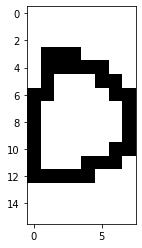

In [113]:
k[0]
plt.imshow(k[0].reshape(16, 8), cmap='gray_r')

In [13]:
d=[1,2,3,4,5]
d =np.array(d)
d= d.reshape(5,-1)
d = np.delete(d, (1), axis=0)
d = np.delete(d, (3), axis=0)
print(d.shape)

(3, 1)


c:\users\hoang nam\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hoang nam\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\hoang nam\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           a       0.80      0.66      0.72      2088
           b       0.74      0.61      0.67       624
           c       0.76      0.82      0.79       856
           d       0.76      0.43      0.55       949
           e       0.79      0.76      0.77      1999
           f       0.36      0.32      0.34       444
           g       0.30      0.68      0.42       343
           h       0.51      0.56      0.53       348
           i       0.76      0.82      0.79      2044
           j       0.00      0.00      0.00         0
           k       0.35      0.54      0.43       218
           l       0.77      0.73      0.75      1833
           m       0.70      0.84      0.76       388
           n       0.64      0.85      0.73      1198
           o       0.78      0.84      0.81      1197
           p       0.50      0.68   

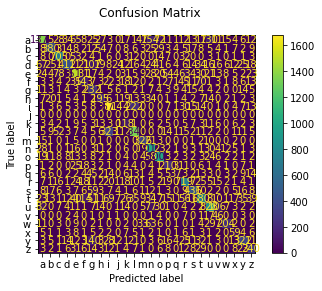

In [32]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( new_data, new_target, test_size=0.4, shuffle=False)
classifier = tree.DecisionTreeClassifier(criterion="entropy", random_state=33)
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
print("Classification report for classifier %s:\n%s\n"
%(classifier, metrics.classification_report(y_test, predicted))) 
disp = metrics.plot_confusion_matrix(classifier, X_test,y_test) 
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)
print("ok")

In [13]:

model = LinearSVC(C=10)
model.fit(X_train,y_train)

c:\users\hoang nam\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=10)

In [30]:
np.savetxt('C:/Users/HOANG NAM/Desktop/new_data.txt', new_data, fmt='%d')
np.savetxt('C:/Users/HOANG NAM/Desktop/new_target.txt', new_target,fmt='%s')

In [31]:
new_data.tofile('C:/Users/HOANG NAM/Desktop/new_data.dat')
new_target.tofile('C:/Users/HOANG NAM/Desktop/new_target.dat')

In [32]:
np.save('C:/Users/HOANG NAM/Desktop/new_data.npy', new_data) 
np.save('C:/Users/HOANG NAM/Desktop/new_target.npy', new_target)

In [ ]:
print(new_data)

In [344]:
from tkinter import *
import PIL
from PIL import Image, ImageDraw, ImageFont
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split
canvas_width=160
canvas_height=320
gray = (255,255,255)
def paint(event):
    x1,y1 = (event.x-20),(event.y-20)
    x2,y2=(event.x+20),(event.y+20)
    c.create_oval(x1,y1,x2,y2,fill="black",outline="black")
    draw.ellipse((x1,y1,x2,y2),fill="black",outline="black")
def xoa():
    global img,draw
    img=PIL.Image.new("RGB",(160,320),gray)
    draw = ImageDraw.Draw(img)
    c.delete("all")
    

def result():
    filename="C:/Users/HOANG NAM/Desktop/digit.jpg"
    img.save(filename)
    lbl['text']=loadimg(filename)
    

X_train, X_test, y_train, y_test = train_test_split( new_data, new_target, test_size=0.1, shuffle=False)

model = tree.DecisionTreeClassifier(criterion="entropy", random_state=33)
model.fit(X_train, y_train)

y_pre = model.predict(X_test)
print(accuracy_score(y_test,y_pre))

def loadimg(filename):
    img = Image.open(filename).convert("L").resize((8,16))
    img = ImageOps.invert(img) 
    im2arr = np.array(img)
    img1d=im2arr.reshape([1,128]) 
    #img1d[img1d >240] = 155
    img1d[img1d < 239] = 0 
    y_pred = classifier.predict(img1d)
    return y_pred


    
master=Tk()
master.title('paint')
c=Canvas(master,width=canvas_width,height=canvas_height,bg="white")
c.pack()








c.pack(expand=YES,fill=BOTH)
c.bind('<B1-Motion>',paint)

#btsave=Button(text="Train",command=train,padx=50,fg="blue")
#btsave.pack()

btresult=Button(text="result",command=result,padx=50,fg="blue")
btresult.pack()

btclear=Button(text="Clear",command=xoa,padx=50,fg="blue")
btclear.pack()

lbl = Label(master, text="")
lbl.pack()

#message = tkinter.Lable(master,text='Press and drag mouse to draw')
#message.pack(side=BOTTOM)

master.mainloop()



0.7206671779141104


In [30]:
X_train, X_test, y_train, y_test = train_test_split( new_data, new_target, test_size=0.4, shuffle=False)
X_train_feature = []
for i in range(len(X_train)):
    feature = hog(X_train[i],orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),block_norm="L2")
    X_train_feature.append(feature)
X_train_feature = np.array(X_train_feature,dtype = np.float32)
print(X_train.shape)

(31291, 128)


array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   6,  34,  46,  19,   0,   0],
       [ 11, 117, 209, 247, 252, 209,  23,   0],
       [181, 255, 255, 242, 254, 255, 118,   0],
       [255, 241,  92,  48, 240, 255, 153,   0],
       [255, 191,   0,  23, 241, 255, 148,   0],
       [255, 199,   0,  20, 237, 255, 100,   0],
       [254, 249, 114, 166, 254, 255,  78,   0],
       [146, 255, 255, 255, 255, 255, 145,   0],
       [  5, 113, 185, 162,  92, 184,  73,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

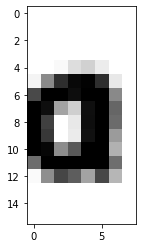

In [338]:
from PIL import Image, ImageOps
import numpy as np
img = Image.open('C:/Users/HOANG NAM/Desktop/digit.jpg').convert("L").resize((8,16))
img = ImageOps.invert(img) 
im2arr = np.array(img)
plt. imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')
im2arr

In [339]:
img1d=im2arr.reshape([1,128]) 
#img1d[img1d >240] = 155
img1d[img1d < 239] = 0 
img1d

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 247, 252,   0,   0,   0,   0, 255, 255, 242,
        254, 255,   0,   0, 255, 241,   0,   0, 240, 255,   0,   0, 255,
          0,   0,   0, 241, 255,   0,   0, 255,   0,   0,   0,   0, 255,
          0,   0, 254, 249,   0,   0, 254, 255,   0,   0,   0, 255, 255,
        255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=uint8)

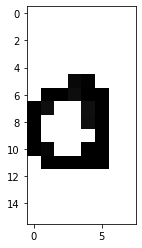

In [340]:
plt.imshow(im2arr, cmap=plt.cm.gray_r, interpolation='nearest')

In [341]:
y_pred = classifier.predict(img1d)
print(y_pred)

['a']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt


y_score1 = model.predict_proba(X_test)[:,1]
y = label_binarize(y_test, classes=[0, 1, 2])
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1,pos_label='your_label')
#print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()